# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [89]:
# Carregamento dos pacotes necessários
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf

%matplotlib inline

Tendo carregado os pacotes necessários, vamos carregar a base "tips", na qual encontram-se as variáveis relacionadas com as gorjetas:

| Variavel | Descrição|
|-|-|
|total_bill| valor total da conta paga pelo cliente | 
|tip| valor da gorjeta que o cliente pagou |
|sex| gênero do garçom (garçonete) que atendeu o cliente e recebeu a gorjeta |
|smoker| informa se o cliente estava na área de fumantes |
|day| dia da semana em que a refeição foi realizada |
|time| tipo de refeição (almoço, janta, etc) |
|size| quantidade de pessoas na mesa

In [90]:
# Carregamento da base
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Com os dados da base, vamos criar as variáveis "net_bill" que informa qual foi o valor da refeição do cliente, e "tip_pct" que é a porcentagem do valor da refeição que foi convertido em gorjeta.

In [91]:
# Criação das variáveis 'tip_pct' e 'net_bill'
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_pct'] = tips['tip'] / tips['net_bill']

Fazendo uma breve visualização da tabela:

In [92]:
# Visualização da base
tips.head()

,total_bill,tip,sex,smoker,day,time,size,net_bill,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,0.172069


Agora, vamos ver como fica um gráfico de 'tip_pct' em função de 'net_bill'.

(0.0, 2.578785858818423)

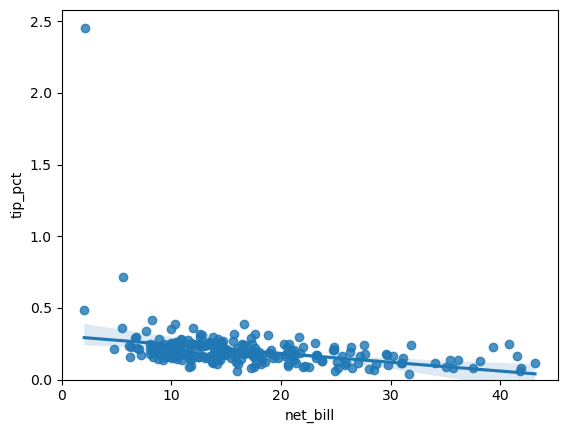

In [93]:
# Gráfico de dispersão da variável 'tip_pct' em função de 'net_bill'
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips)

# Tomada do ponto (0, 0) como origem do gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

Percebe-se que há dados muito discrepantes dos restantes, na qual 'tip_pct' > 0.5. Então, vamos remover estes dados e refazer o gráfico. 

(0.0, 0.505398619388979)

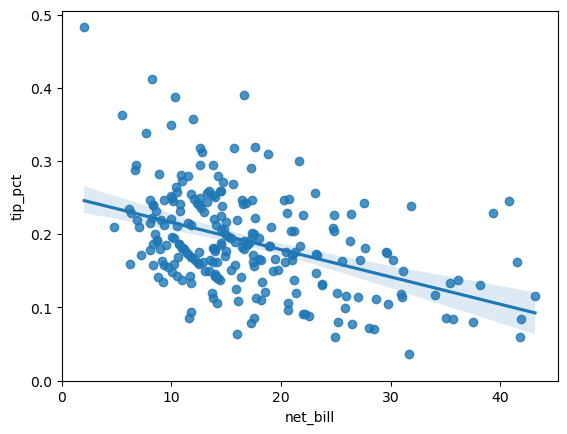

In [94]:
# Remoção dos dados discrepantes
tips = tips[tips['tip_pct'] < 0.5].copy()

# Gráfico de dispersão da variável 'tip_pct' em função de 'net_bill'
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips)

# Tomada do ponto (0, 0) como origem do gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

Tendo feito o gráfico com um ajuste linear entre as variáveis, vamos aplicar um modelo de regressão nesse ajuste, para ver quão "bom" ele é para explicar a relação entre as variáveis.

In [95]:
# Modelo de regressão da variável 'tip_pct' explicada por 'net_bill'
fit_linear = smf.ols('tip_pct ~ net_bill', data = tips).fit()

# Impressão dos resultados do ajuste
fit_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     56.10
Date:                Wed, 31 May 2023   Prob (F-statistic):           1.31e-12
Time:                        16:06:02   Log-Likelihood:                 331.48
No. Observations:                 242   AIC:                            -659.0
Df Residuals:                     240   BIC:                            -652.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2538      0.009     27.252      0.000       0.235       0.272
net_bill      -0.0037      0.000     -7.490      0.000      -0.005      -0.003
==============================================================================
Omnibus:                       25.646   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.523
Skew:                           0.764   Prob(JB):                     1.43e-07
Kurtosis:                       3.889   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O R² do ajuste apresenta um valor muito baixo (0.189), implicando que o ajuste linear não é condizente com o comportamento das variáveis (isso já era esperado com a observação da dispersão dos pontos presentes no gráfico acima). Para uma última análise desse ajuste, verifiquemos o gráfico dos resíduos.

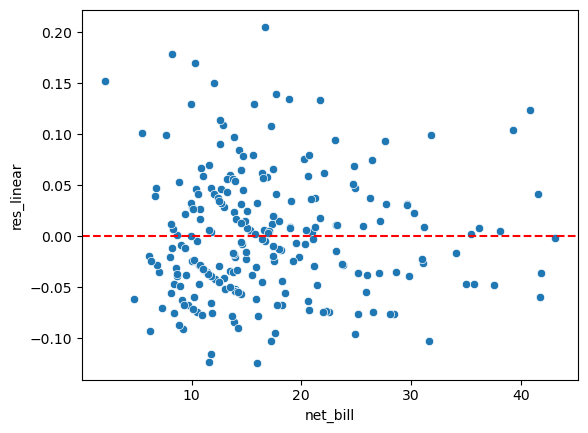

In [96]:
# Tomada dos resíduos do ajuste
tips['res_linear'] = fit_log.resid

# Gráfico dos resíduos com o ajute de uma reta em y = 0
sns.scatterplot(x = 'net_bill', y = 'res_linear', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

Há uma grande concentração dos resíduos na região 10 < net_bill < 20, implicando que a variância não apresenta um comportamento uniforme. Dessa forma, os resíduos não estão no comportamento desejado.

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

Utilizando os mesmos dados anteriores, vamos realizar um ajuste de 'tip_pct' em função do logaritmo de 'net_bill'.

In [97]:
# Ajuste do modelo sobre os dados:
fit_log_x = smf.ols('tip_pct ~ np.log(net_bill)', data = tips).fit()

# Impressão dos resultados do ajuste: 
fit_log_x.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     68.11
Date:                Wed, 31 May 2023   Prob (F-statistic):           1.03e-14
Time:                        16:06:02   Log-Likelihood:                 336.29
No. Observations:                 242   AIC:                            -668.6
Df Residuals:                     240   BIC:                            -661.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3818      0.023     16.261      0.000       0.336       0.428
np.log(net_bill)    -0.0702      0.009     -8.253      0.000      -0.087      -0.053
==============================================================================
Omnibus:                       15.660   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.845
Skew:                           0.631   Prob(JB):                     0.000220
Kurtosis:                       3.280   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O R² do ajuste apresenta um valor maior em relação ao anterior, implicando que este ajuste logarítmico é mais condizente com o comportamento dos dados quando comparado ao ajuse linear. Ainda assim, apresenta um valor longe do ideal (0.221).

Montando os gráficos de resíduos e do ajuste:

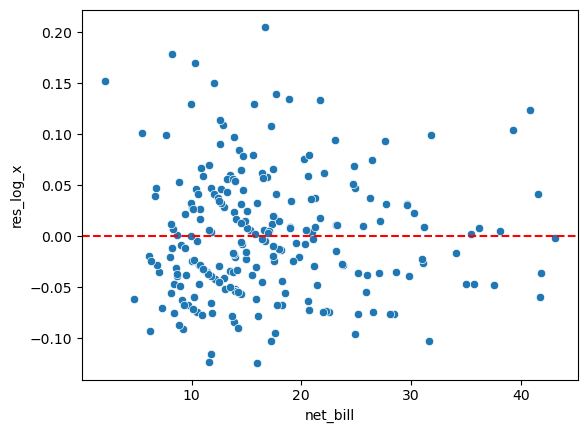

In [98]:
# Tomada dos resíduos:
tips['res_log_x'] = fit_log.resid

# Montagem do gráfico dos resíduos, tendo uma reta constante em y = 0:
sns.scatterplot(x = 'net_bill', y = 'res_log_x', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

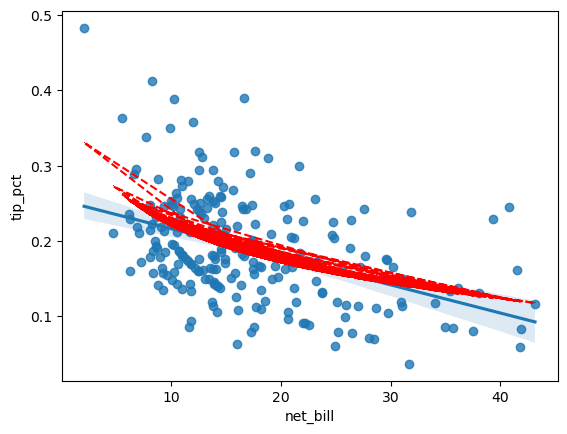

In [99]:
# Inserção dos dados no gráfico:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips)

# Ajuste da função entre os dados:
plt.plot(tips['net_bill'], fit_log_x.fittedvalues, 'r,--')

Os resíduos não apresentam um padrão evidente ou uma depêndencia em relação à variável net_bill, sendo condizente com o ideal. Por outro lado, o gráfico do ajuste de tip_pct em função de log(net_bill) não foi plausível, uma vez que há vários pontos distantes do ajuste. Além disso, há mais de um valor de tip_pct para um mesmo net_bill, o que não condiz com o ajuste de uma função.

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

Realizando um novo ajuste, sendo este o de tip_pct em função do polinômio de segundo grau em net_bill:

In [100]:
# Ajuste do modelo sobre os dados:
fit_polinomio = smf.ols('tip_pct ~ net_bill + np.power(net_bill,2)',
                        data = tips).fit()

# Impressão dos resultados do ajuste: 
fit_polinomio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     30.98
Date:                Wed, 31 May 2023   Prob (F-statistic):           1.09e-12
Time:                        16:06:03   Log-Likelihood:                 333.96
No. Observations:                 242   AIC:                            -661.9
Df Residuals:                     239   BIC:                            -651.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.2932      0.020     14.668      0.000       0.254       0.333
net_bill                 -0.0082      0.002     -3.961      0.000      -0.012      -0.004
np.power(net_bill, 2)     0.0001   4.67e-05      2.223      0.027    1.18e-05       0.000
==============================================================================
Omnibus:                       19.830   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.215
Skew:                           0.696   Prob(JB):                     1.50e-05
Kurtosis:                       3.514   Cond. No.                     2.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

O R² deste foi inferior ao do ajuste logarítmico, implicando que este ajuste será inferior em relação ao anterior.

Confirmemos isso através dos gráficos de resíduos e de ajuste:

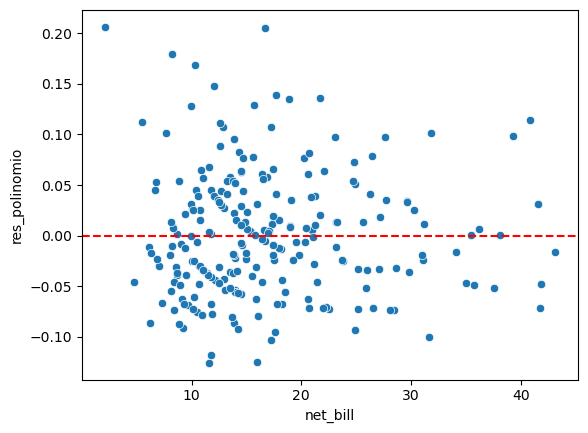

In [101]:
# Tomada dos resíduos:
tips['res_polinomio'] = fit_polinomio.resid

# Montagem do gráfico dos resíduos, tendo uma reta constante em y = 0:
sns.scatterplot(x = 'net_bill', y = 'res_polinomio', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

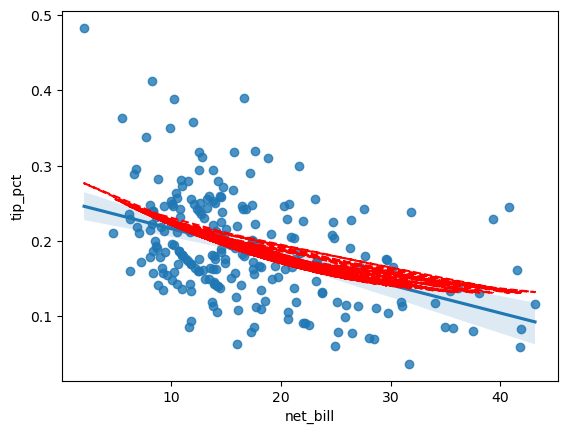

In [102]:
# Inserção dos dados no gráfico:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips)

# Ajuste da função entre os dados:
plt.plot(tips['net_bill'], fit_polinomio.fittedvalues, 'r,--')

Aparentemente, não houveram mudanças no comportamento dos resíduos em relação a net_bill. Por outro lado, o ajuste polinomial está mais próximo da reta do ajuste linear, implicando maior distância em relação aos pontos do gráfico. Dessa forma, este não foi um bom modelo, sendo inferior ao anterior.

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

Para um ajuste diferente, vamos aplicar uma função logarítmica na variável resposta 'tip_pct' ao invés da variável explicativa 'net_bill':

In [103]:
# Ajuste do modelo sobre os dados:
log_y = smf.ols('np.log(tip_pct) ~ net_bill', data = tips).fit()

# Impressão dos resultados do ajuste: 
log_y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     69.62
Date:                Wed, 31 May 2023   Prob (F-statistic):           5.70e-15
Time:                        16:06:05   Log-Likelihood:                -81.349
No. Observations:                 242   AIC:                             166.7
Df Residuals:                     240   BIC:                             173.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3383      0.051    -26.095      0.000      -1.439      -1.237
net_bill      -0.0229      0.003     -8.344      0.000      -0.028      -0.018
==============================================================================
Omnibus:                        8.210   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.483
Skew:                          -0.362   Prob(JB):                       0.0144
Kurtosis:                       3.563   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dos modelos anteriores, este foi o que apresentou maior R² (0.225), que ainda assim, é levemente próximo ao primeiro ajuste logarítmico.

Vejamos o gráfico de resíduos:

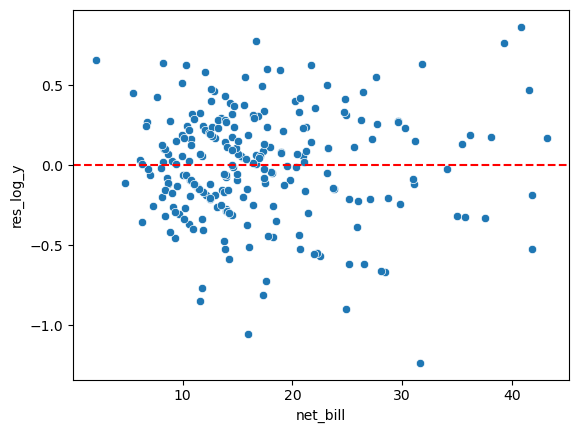

In [104]:
# Tomada dos resíduos:
tips['res_log_y'] = log_y.resid

# Montagem do gráfico dos resíduos, tendo uma reta constante em y = 0:
sns.scatterplot(x = 'net_bill', y = 'res_log_y', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

Aparentemente, continua a não apresentar um padrão evidente, além de ter um aspecto de independência em relação à variável 'net_bill'. 

Agora, tomemos o R² do valores predizentes de 'tip_pct' em relação aos seus valores reais. Para isso, uma vez que os valores ajustados estão em logarítmos, tomemos suas exponenciais:

In [105]:
# Tomada dos valores predizentes:
tips['pred_tip_pct'] = np.exp(log_y.fittedvalues)

# Cálculo do R² dos valores predizentes em relação aos valores reais:
tips[['pred_tip_pct', 'tip_pct']].corr().iloc[0,1]**2

0.20051484016183757

Este R² é inferior em relação ao anterior, implicando que a relação entre os valores predizentes e reais da variável é menor quando comparada à relação entre os valores ajustados e a variável 'net_bill'.

Tomando o gráfico do ajuste:

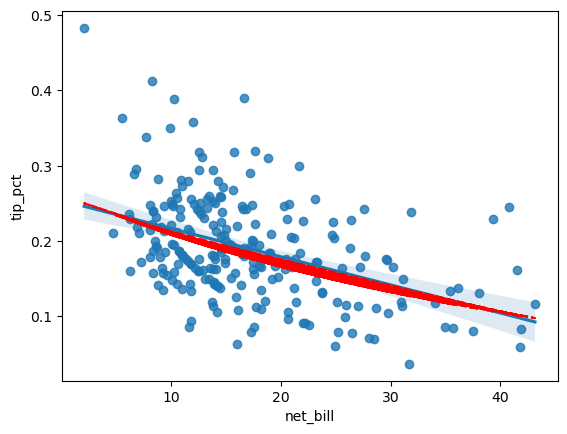

In [106]:
# Inserção dos dados no gráfico:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips)

# Ajuste da função entre os dados:
plt.plot(tips['net_bill'], tips['pred_tip_pct'], 'r--')

Apesar do ajuste não estar tão disperso quanto os anteriores, ele ainda passa por poucos pontos do gráfico. Logo, não se pode afirmar visualmente que este seja um bom ajuste.

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

Por fim, ajustemos um modelo na qual são tomados os logaritmos de ambas as variáveis:

In [107]:
# Ajuste do modelo sobre os dados:
log_xy = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data = tips).fit()

# Impressão dos resultados do ajuste: 
log_xy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     71.57
Date:                Wed, 31 May 2023   Prob (F-statistic):           2.65e-15
Time:                        16:06:06   Log-Likelihood:                -80.588
No. Observations:                 242   AIC:                             165.2
Df Residuals:                     240   BIC:                             172.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.6285      0.131     -4.780      0.000      -0.887      -0.370
np.log(net_bill)    -0.4027      0.048     -8.460      0.000      -0.496      -0.309
==============================================================================
Omnibus:                        8.926   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.019
Skew:                          -0.406   Prob(JB):                       0.0110
Kurtosis:                       3.485   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

De todos os modelos, este foi o que apresentou maior R² (0.230). Ainda assim, este é muito inferior ao ideal (quanto mais próximo de 1, melhor).

Montando o gráfico de resíduos:

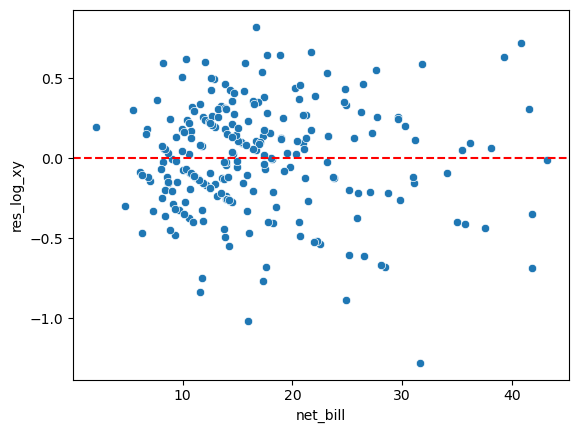

In [108]:
# Tomada dos resíduos:
tips['res_log_xy'] = log_xy.resid

# Montagem do gráfico dos resíduos, tendo uma reta constante em y = 0:
sns.scatterplot(x='net_bill', y='res_log_xy', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

Não se verficam alterações perceptíveis no gráfico quando comparado ao que foi gerado no item 4.

Verificando o R² do modelo em relação aos valores reais da variável tip_pct, na qual é realizado o mesmo procedimento do item 4:

In [109]:
# Tomada dos valores predizentes:
tips['pred_logs'] = np.exp(log_xy.fittedvalues)

# Cálculo do R² dos valores predizentes em relação aos valores reais:
tips[['pred_logs', 'tip_pct']].corr().iloc[0,1]**2

0.229143365170227

O novo R² continua sendo baixo (0.229), entretanto, maior do que o obtido no item 4. Dessa forma, este modelo tende a ser mais condizente com o comportamento das variáveis quando comparado aos anteriores.

Visualizando o ajuste do modelo graficamente:

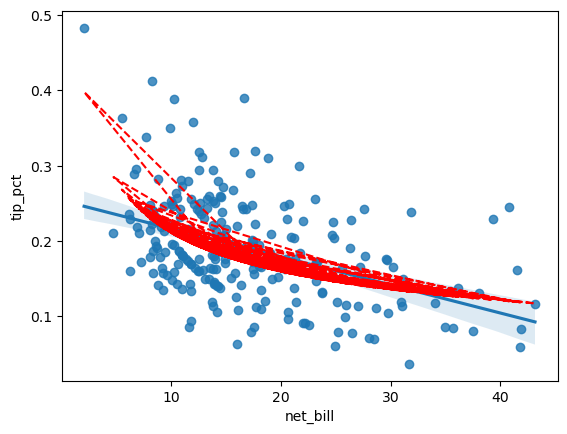

In [110]:
# Inserção dos dados no gráfico:
sns.regplot(x='net_bill', y='tip_pct', data = tips)

# Ajuste da função entre os dados:
plt.plot(tips['net_bill'], tips['pred_logs'], 'r--')

Neste gráfico, o ajuste passa por um maior número de pontos do que os anteriores. Entretanto, verifica-se maior número de tip_pct para mesmos valores de net_bill. Dessa forma, ainda não foi possível tomar o ajuste de uma função plausível.

###  6. qual modelo resultou no melhor ajuste?

De acordo com a comparação dos R²'s, o melhor ajuste foi resultado do último modelo, na qual foi ajustado o log(tip_pct) em função do log(net_bill). Apesar disso, nenhum deles pode ser considerado um "bom" ajuste, tanto pelos pequenos valores de R² (todos estiveram na ordem de 0.2) e da parte visual, na qual vários pontos ficaram foram do ajuste. Isso se deve à alta dispersão dos valores de tip_pct em relação aos valores de net_bill.